In [56]:
import os
from os.path import expanduser   #home dir
dbase='test'  ## TEST dbase feat
table='db'
home = expanduser("~")
with open(home+'/.'+table+'.mysql', 'r') as content:
    allf = content.read().split('\n')
config = {
  'user': allf[1],  'password': allf[2],  'host': allf[0],
  'database': dbase,  'raise_on_warnings': True,
}
print('I have data to access mysql /',table,'/ on',allf[0])

I have data to access mysql / db / on localhost


In [222]:
import mysql.connector
import datetime
from datetime import date
days=2.5
week = datetime.datetime.now() - datetime.timedelta(hours=24*days)
weekp1 = datetime.datetime.now() - datetime.timedelta(hours=24*days+24)
cnx = mysql.connector.connect(**config)
query="SELECT * FROM "+table+" WHERE t > '"+str(week)+"' ORDER BY t DESC"
print(query)

SELECT * FROM db WHERE t > '2016-12-28 03:52:47.173636' ORDER BY t DESC


In [223]:
import pandas as pd
df = pd.read_sql( query , con=cnx)
print('loaded dataframe from MySQL. records:', len(df))
cnx.close()

loaded dataframe from MySQL. records: 850


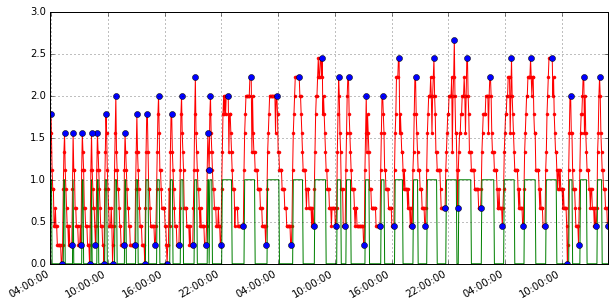

In [224]:
%matplotlib inline
import math
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import matplotlib.pyplot as plt
tli=df.t.tolist()
gli=df.g.tolist()
mn=min(gli)
gli=[x-mn for x in gli]
mx=max(gli)
## limit for fast rise 0.3 deg
## limit peak detect is 40% of the range
g2=[ j for j in gli ]
g2on=[ 1 if (x/mx)>0.5 else 0  for x in gli ]
#g2a=[ (i-j) if (i-j)>0.3 else 0 for i, j in zip(gli[:-1], gli[1:])]
#g3=[ math.ceil((j-mean)/mx) for i, j in zip(gli[:-1], gli[1:])]

lastgon=0.5
extremes=[]
for i in range( len(gli)):
    if  ((lastgon!=g2on[i])or(i==len(gli)-1)):
        #MM=smax if lastgon==1 else smin
        if (lastgon!=0.5): 
           # print(i,'nalezeno', pair) 
            extremes.append( pair )
        smax=0
        smin=mx
        lastgon=g2on[i]
    if g2on[i]==1:
        if ( gli[i]>smax ):
            smax=gli[i]
            pair=( tli[i], gli[i] )
    if g2on[i]==0:
        if ( gli[i]<smin ):
            smin=gli[i]
            pair=( tli[i], gli[i] )
#print(mx,0,'Nalezeno',smax,smin, extremes)        
        
#monthsFmt = DateFormatter("%H:%M(%d)")
fig, ax = plt.subplots( figsize=(10, 5), dpi=100 )
#ax.xaxis.set_major_formatter(monthsFmt)#nice diagonal format
plt.plot( df.t, g2 ,'r.-')
#plt.plot( df.t[1:], g2a ,'b.-')
#plt.plot( df.t[1:], g3 ,'g.:')
plt.plot( df.t, g2on ,'g')
plt.plot( *zip(*extremes) , marker='o', color='b', ls='')
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

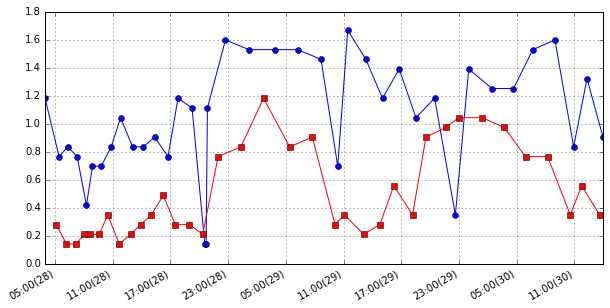

In [225]:
#deltas for heating
#hh=[ (j[0]-i[0]).total_seconds()/3600 for i,j in zip( extremes[1:],extremes[:-1]) if j[1]<1.0]
hh=[  (i[0],(j[0]-i[0]).total_seconds()/3600) for i,j in zip( extremes[1:],extremes[:-1]) if i[1]>1.0]
#deltas for coolin
#cc=[ (j[0]-i[0]).total_seconds()/3600 for i,j in zip( extremes[1:],extremes[:-1]) if j[1]>1.0]
cc=[  (i[0],(j[0]-i[0]).total_seconds()/3600) for i,j in zip( extremes[1:],extremes[:-1]) if i[1]<1.0]
#print( hh )

monthsFmt = DateFormatter("%H:%M(%d)")
fig2, ax2 = plt.subplots( figsize=(10, 5), dpi=100 )
ax2.xaxis.set_major_formatter(monthsFmt)#nice diagonal format

plt.plot( *zip(*hh)   , color='b' , marker='o',  ls='-')
plt.plot( *zip(*cc)   , color='r' , marker='s',  ls='-')

#plt.hist( hh , 30, color='b' , edgecolor="none" , range=[0,3]  )
#plt.hist( cc , 30  , color='r' , range=[0,3] , alpha=0.4  )

plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()